<a href="https://colab.research.google.com/github/OliverRevilla/Machine-Learning-Python/blob/main/Ajuste_Distribucion_Weibull.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from scipy.stats import exponweib
from scipy.stats import norm
from statsmodels.stats.weightstats import ztest

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


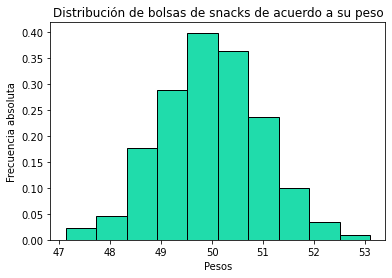

 Al ajustarse a una distribución exponencial-weibull se tiene lo siguiente: 
 El parámetro x es 14.542144963466017 
 El parámetro k es 42.397194987483516 
 El parámetro lambda es -62.348966960848394 
 El parámetro α es 109.3778567694495 



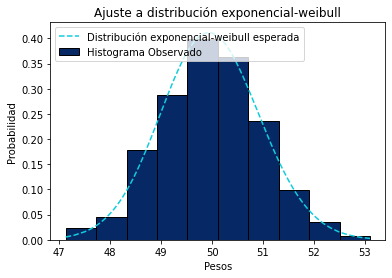

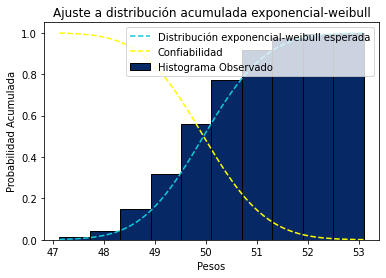

MAE:  0.018293232643381705 
 MSE:  0.0005715046782843547


In [ ]:
#Graficando un histograma
np.random.seed(2020)

#Simular proceso de producción de snacks de 50 gramos [47,53] en 1000 bolsas de snack
mu,sigma = 50,1
gramaje = np.random.normal(mu,sigma,1000)

#Histograma de frecuencias
plt.hist(gramaje, bins = 10, color = '#20DCAB', edgecolor = 'black', density = 10, cumulative=0)
plt.title('Distribución de bolsas de snacks de acuerdo a su peso')
plt.xlabel('Pesos')
plt.ylabel('Frecuencia absoluta')
plt.show()

#Estadístico
ztest(gramaje, value = 50)

#Ordenamiento de datos
gramaje = np.sort(gramaje)

#Obteniendo parámetros de distribución
#Ajustamos a una distribución exponencial-weibull
dist = getattr(stats,'exponweib')
parametros = dist.fit(gramaje)
a,b,c,d = dist.fit(gramaje) #guardar cada parámetro
x = 'El parámetro x es {}'
k = 'El parámetro k es {}'
lamda = 'El parámetro lambda es {}'
α = 'El parámetro α es {}'
print(" Al ajustarse a una distribución exponencial-weibull se tiene lo siguiente:",'\n',
    x.format(parametros[0]),'\n',
    k.format(parametros[1]),'\n',
    lamda.format(parametros[2]),'\n',
    α.format(parametros[3]),'\n'
      )

#Prueba de bondad de ajuste, para analizar la validez del modelo
stats.kstest(gramaje,'exponweib',parametros)

#Se grafica la función de densidad
x = gramaje
dexponweib = stats.exponweib(a,b,c,d).pdf(x)
graf_distribuido = plt.hist(x, bins = 10, label = 'Histograma Observado', color = '#062966', edgecolor = 'black', density = 10, cumulative=0)
plt.plot(x,dexponweib, label = 'Distribución exponencial-weibull esperada', color = '#11CCDC', ls = '--')
plt.title('Ajuste a distribución exponencial-weibull')
plt.xlabel('Pesos')
plt.ylabel('Probabilidad')
plt.legend(loc = 2)
plt.show()

#Se grafica la funcion acumulada
dexponweib_acumulado = stats.exponweib(a,b,c,d).cdf(x)
graf_acumulado = plt.hist(x, bins = 10, label = 'Histograma Observado', color = '#062966', edgecolor = 'black', density = 10, cumulative=1)
plt.plot(x,dexponweib_acumulado, label = 'Distribución exponencial-weibull esperada', color = '#11CCDC', ls = '--')
plt.plot(x,1 - dexponweib_acumulado, label = 'Confiabilidad', color = 'yellow', ls = '--')
plt.title('Ajuste a distribución acumulada exponencial-weibull')
plt.xlabel('Pesos')
plt.ylabel('Probabilidad Acumulada')
plt.legend(loc = 'best')
plt.show()

#Obteniendo métricas de validación del modelo
#Marcas de clase
marcas_clase = np.linspace(x.min(),x.max(),10)
marcas_clase
modelo_estadistico = stats.exponweib(a,b,c,d).pdf(marcas_clase)
modelo_estadistico

#Las alturas de la gráfica
graf_distribuido[0] 

from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE = mean_absolute_error(graf_distribuido[0], modelo_estadistico)
MSE = mean_squared_error(graf_distribuido[0], modelo_estadistico)
print("MAE: ",MAE, "\n","MSE: ",MSE)